![](../images/logos/KIEPSKIES.jpg)

# Spatial Data Analysis 

## 1. Introduction to Spatial Data and GIS

<span style="color: #00008B;">**What is spatial data?**</span> 

Spatial data is any data that has a geographical or locational component—meaning it is tied to a specific place on Earth. Unlike traditional datasets, which might focus on numbers and categories, spatial data includes coordinates (latitude and longitude), regions, or boundaries that help us visualize and analyze locations.

<span style="color: #00008B;">**Types of Spatial Data**</span> 

There are two primary types of spatial data:

1. Vector Data – Represents features using points, lines, and polygons.

- Points: Locations like cities, trees, or store locations.
- Lines: Roads, rivers, or pathways.
- Polygons: Boundaries like countries, lakes, or land parcels.

Example of data with vector can be found is the [New York City Airbnb Open Data](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data)

2. Raster Data – Represents data as a grid of pixels (like images).

- Used in satellite imagery, elevation models, and climate data.
- Example: A weather map showing temperature variations.

<span style="color: #00008B;">**Why is Spatial Data Visualization Important?**</span>

- *Mapping:* Creating interactive maps (Google Maps, OpenStreetMap).
- *Urban Planning:* Optimizing city layouts, zoning, and infrastructure.
- *Environmental Studies:* Tracking deforestation, air pollution, or climate change.
- *Business Analytics:* Finding the best locations for stores, analyzing customer distribution.
- *Disaster Management:* Predicting flood zones, tracking wildfires, or planning evacuation routes.

<span style="color: #00008B;">**What is GIS (Geographic Information Systems)?**</span> 

A GIS is a system that captures, stores, analyzes, and visualizes spatial data. It helps in:

- Mapping locations and features.
- Analyzing spatial patterns (e.g., where most accidents occur).
- Integrating data from multiple sources (like traffic data and weather conditions).

💡 Here are examples of the commonly know GIS Applications:

- Google Earth 🌎
- Weather forecast maps 🌦️
- Real estate heatmaps 🏡

## 2. Setting Up Your Python Environment

Before diving into spatial data visualization, let’s set up a Python environment with the necessary libraries. These tools will help us work with vector data, create interactive maps, perform geometry operations, and plot spatial data.

Run the following command to install all the required libraries:

```bash
pip install geopandas folium shapely matplotlib seaborn contextily
```

- geopandas – Extends Pandas to handle geospatial data like points, lines, and polygons.
- folium – Creates interactive maps using Leaflet.js.
- shapely – Performs geometry operations (distance, intersections, buffers, etc.).
- matplotlib & seaborn – Used for plotting spatial data (scatter plots, heatmaps). 
- contextily  – Adds basemaps (e.g., satellite or OpenStreetMap) to spatial visualizations.

## 3. Working with Spatial Data Using GeoPandas 

GeoPandas extends Pandas to work with geospatial data (points, lines, polygons). It simplifies spatial data handling without needing a full GIS software.

Geopandas is used to; 

- Reads and writes shapefiles (.shp), GeoJSON, CSV with coordinates
- Supports geometries (points, lines, polygons)
- Built-in spatial operations (e.g., intersections, buffers, joins)
- Works seamlessly with Matplotlib, Folium, and Shapely

GeoPandas can load spatial datasets in different formats:

The shape file can be loaded as
```python
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("filename.shp")
print(gdf.head())  # Display first few rows
```

The geojson file loaded by 
```python
gdf = gpd.read_file("filename.geojson")
```

In this case, we will be working with the `uk_vegetation.shp`:

In [1]:
# Load the required packages 
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster

In [5]:
# Load CSV file
df = pd.read_csv("../data/AB_NYC_2019.csv")  # Replace with actual file path

# # Ensure the CSV contains 'longitude' and 'latitude' columns
# if 'longitude' not in df.columns or 'latitude' not in df.columns:
#     raise ValueError("CSV file must contain 'longitude' and 'latitude' columns.")

# Convert longitude and latitude into Point geometry
df['geometry'] = df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert Pandas DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Print GeoDataFrame summary
gdf.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,POINT (-73.97237 40.64749)
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,POINT (-73.98377 40.75362)
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,POINT (-73.9419 40.80902)
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,POINT (-73.95976 40.68514)
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,POINT (-73.94399 40.79851)


In [6]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              48895 non-null  int64   
 1   name                            48879 non-null  object  
 2   host_id                         48895 non-null  int64   
 3   host_name                       48874 non-null  object  
 4   neighbourhood_group             48895 non-null  object  
 5   neighbourhood                   48895 non-null  object  
 6   latitude                        48895 non-null  float64 
 7   longitude                       48895 non-null  float64 
 8   room_type                       48895 non-null  object  
 9   price                           48895 non-null  int64   
 10  minimum_nights                  48895 non-null  int64   
 11  number_of_reviews               48895 non-null  int64   
 12  last_revie

<span style="color: #00008B;">**Plotting Spatial Data (Points)**</span>

Once we have converted our data into a GeoDataFrame, we can visualize it using GeoPandas’ built-in plotting capabilities.



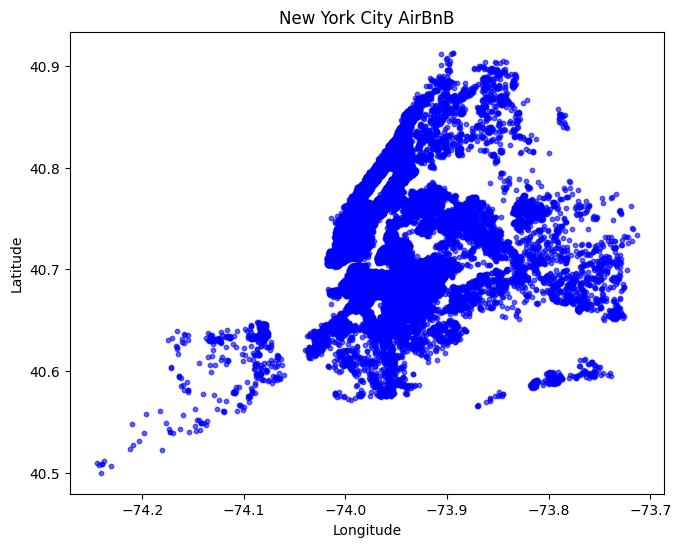

In [7]:
import matplotlib.pyplot as plt

# Plot points on a simple map
gdf.plot(figsize=(10, 6), color='blue', markersize=10, alpha=0.6)
plt.title("New York City AirBnB")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


4. Handling Coordinate Reference Systems (CRS) and Projections
Geospatial data may come in different coordinate reference systems (CRS). It is essential to set and transform CRS for accurate mapping and spatial analysis.

Setting CRS: If the data uses latitude and longitude, we typically assign the WGS 84 (EPSG:4326) CRS.
Reprojecting Data: We can convert the data to another CRS for specific analysis or visualization.

Lets check the crs first before setting it

In [8]:
print(gdf.crs)

None


Since there is no CRS, we will set it

In [9]:
# Set CRS to WGS 84 (EPSG:4326)
gdf.set_crs(epsg=4326, inplace=True)

# Convert to a projected CRS (e.g., British National Grid EPSG:27700)
gdf_projected = gdf.to_crs(epsg=27700)

# Print CRS details
print("Original CRS:", gdf.crs)
print("Projected CRS:", gdf_projected.crs)


Original CRS: EPSG:4326
Projected CRS: EPSG:27700


## 4. Basic Map Visualization

- Plotting spatial datasets with Matplotlib & GeoPandas.
- Styling and customizing maps:
	- Adding legends, colors, and boundaries.
	- Using categorical and continuous color scales.

<span style="color: #00008B;">**Styling and Customizing Maps**</span>

To make maps more informative, we can add styles like colors, legends, and boundaries.

We can color features based on a column (e.g., vegetation type, population density).In this case we are focusing on AirBnB prices in New York

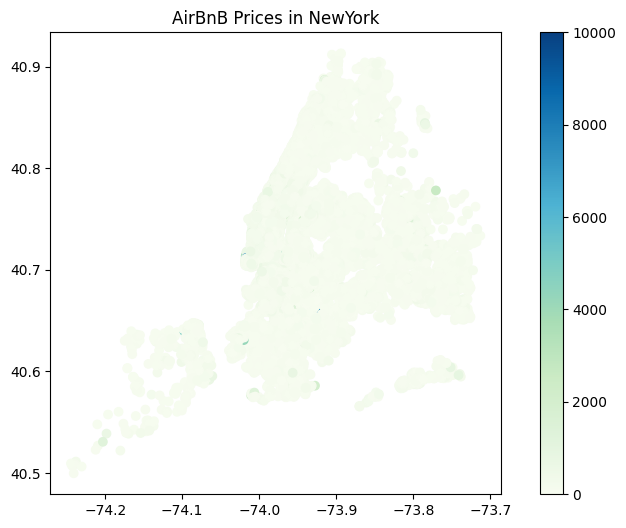

In [10]:
# Plot with color based on a categorical attribute
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column="price", cmap="GnBu", legend=True, ax=ax)

# Add title
ax.set_title("AirBnB Prices in NewYork")

plt.show()

<span style="color: #00008B;">**Adding Legends, Boundaries, and Additional Layers**</span>

To enhance map readability, we can add legends, boundaries, and multiple layers.

Lets add some boundaries

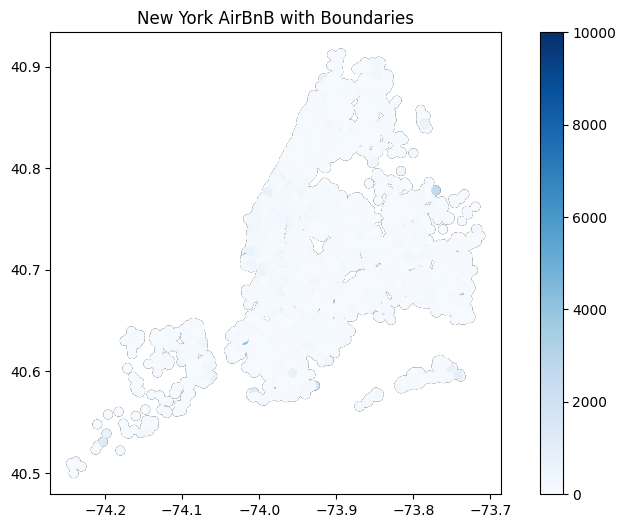

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
gdf.plot(ax=ax, column="price", cmap="Blues", legend=True)

ax.set_title("New York AirBnB with Boundaries")

plt.show()

## 5. Interactive Maps with Folium
- Introduction to Folium for web-based interactive maps.
- Creating:

    - Basic interactive maps.
    - Markers and pop-ups for locations.
	- Choropleth maps (color-coded regions).
    - Adding map tiles (satellite, OpenStreetMap, etc.).

Folium is a powerful Python library for creating interactive maps that can be embedded in web pages. It integrates with Jupyter Notebooks and allows you to visualize spatial data dynamically. Since we're working with New York Airbnb data, we'll use Folium to explore price distributions geographically

<span style="color: #00008B;">**Setting Up Folium and Creating Basic Maps**</span>

Now, let's import the required libraries and create a basic map centered around New York City.

In [12]:
import folium
import pandas as pd

# Define the center of New York City
nyc_center = [40.7128, -74.0060]

# Create a basic folium map
m = folium.Map(location=nyc_center, zoom_start=12)

# Display the map
m

In [13]:
# Define the center of New York City
mombasa_center = [-4.0435, 39.6682]

# Create a basic folium map
mombasa = folium.Map(location=mombasa_center, zoom_start=12)

# Display the map
mombasa

<span style="color: #00008B;">**Adding Markers and Pop-Ups for Locations**</span>

We'll now load the Airbnb dataset and plot markers representing Airbnb listings. The price of each listing will be displayed in a pop-up.


Lets pick 10 first rows


In [14]:
df = df.head(50)

In [16]:
from folium.plugins import FastMarkerCluster

# Define the center of the map (NYC center)
nyc_center = [40.7128, -74.0060]

# Create a folium map
m = folium.Map(location=nyc_center, zoom_start=12)

# Use FastMarkerCluster for better performance
FastMarkerCluster(
    data=df[["latitude", "longitude"]].values.tolist()
).add_to(m)

# Display the map
m

Labelling location of Air BnBs, with their names and prices

In [17]:


# Define the center of the map (NYC center)
nyc_center = [df["latitude"].mean(), df["longitude"].mean()]

# Create a folium map
m = folium.Map(location=nyc_center, zoom_start=12, tiles="CartoDB positron")

# Use MarkerCluster to improve performance
marker_cluster = MarkerCluster().add_to(m)

# Add markers in bulk (list comprehension for speed)
[
    folium.Marker(
        location=[row["latitude"], row["longitude"]],
        popup=folium.Popup(f"🏠 <b>{row['name']}</b><br>💰 Price: ${row['price']}", max_width=300),
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(marker_cluster)
    for _, row in df.iterrows()
]

# Display the map
m


<span style="color: #00008B;">**Creating a Choropleth Map (Color-Coded Regions by Price)**</span>

A choropleth map helps visualize price variations across different areas. We'll use Folium's Choropleth layer.

In [18]:
import numpy as np
import folium

# Categorize prices into bins for visualization using quantiles
df["price_category"] = pd.qcut(df["price"], q=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])

# Precompute percentiles for efficiency
percentiles = np.percentile(df["price"], [20, 40, 60, 80])

# Optimized color function using precomputed percentiles
def color_producer(price):
    if price <= percentiles[0]:  # 20th percentile
        return "green"
    elif price <= percentiles[1]:  # 40th percentile
        return "blue"
    elif price <= percentiles[2]:  # 60th percentile
        return "purple"
    elif price <= percentiles[3]:  # 80th percentile
        return "orange"
    else:  # Above 80th percentile
        return "red"

# Create a folium map
m = folium.Map(location=nyc_center, zoom_start=12, tiles="CartoDB positron")

# Use list comprehension for performance
[
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color=color_producer(row["price"]),
        fill=True,
        fill_color=color_producer(row["price"]),
        fill_opacity=0.6,
        popup=folium.Popup(f"🏠 <b>Price: ${row['price']}</b>", max_width=200),
    ).add_to(m)
    for _, row in df.iterrows()
]

m

<span style="color: #00008B;">**Adding Different Map Tiles (Satellite, OpenStreetMap, etc.)**</span>

Folium allows us to change map backgrounds to satellite, terrain, OpenStreetMap, etc..

In [21]:
import folium

# Create a folium map with optimized tile selection
m = folium.Map(location=nyc_center, zoom_start=12, tiles="CartoDB positron")  # Lighter and clearer than "Stamen Terrain"

# Use a feature group to improve rendering performance
airbnb_listings = folium.FeatureGroup(name="Airbnb Listings")

# Optimize marker addition with list comprehension
[
    airbnb_listings.add_child(
        folium.Marker(
            location=[row["latitude"], row["longitude"]],
            popup=folium.Popup(f"🏠 <b>Price: ${row['price']}</b>", max_width=200),
            icon=folium.Icon(color="blue", icon="info-sign"),
        )
    )
    for _, row in df.iterrows()
]

# Add feature group to the map
m.add_child(airbnb_listings)

# Add a layer control for better interactivity
folium.LayerControl().add_to(m)

m